In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Hybrid metadata:

In [2]:
cle = pd.read_csv('cle_metadata_hybrid.csv')
vir = pd.read_csv('vir_metadata_hybrid.csv')
hun = pd.read_csv('hun_metadata_hybrid.csv')
swi = pd.read_csv('swi_metadata_hybrid.csv')

In [3]:
cle_train,cle_test = train_test_split(cle,test_size=0.33, random_state=42)
vir_train,vir_test = train_test_split(vir,test_size=0.33, random_state=42)
hun_train,hun_test = train_test_split(hun,test_size=0.33, random_state=42)
swi_train,swi_test = train_test_split(swi,test_size=0.33, random_state=42)

In [4]:
cle_train.to_csv('cle_metadata_hybrid_train.csv',index = False)
cle_test.to_csv('cle_metadata_hybrid_test.csv',index = False)

In [5]:
vir_train.to_csv('vir_metadata_hybrid_train.csv',index = False)
vir_test.to_csv('vir_metadata_hybrid_test.csv',index = False)

In [6]:
hun_train.to_csv('hun_metadata_hybrid_train.csv',index = False)
hun_test.to_csv('hun_metadata_hybrid_test.csv',index = False)

In [7]:
swi_train.to_csv('swi_metadata_hybrid_train.csv',index = False)
swi_test.to_csv('swi_metadata_hybrid_test.csv',index = False)

In [8]:
Train = pd.concat([cle_train,vir_train,hun_train,swi_train])
Test = pd.concat([cle_test,vir_test,hun_test,swi_test])

In [9]:
X_train = Train.iloc[:,:-1]
X_test = Test.iloc[:,:-1]

y_train = Train.iloc[:,-1]
y_test = Test.iloc[:,-1]

Y_train_binary = y_train.apply(lambda x: 1 if x > 0 else 0)
Y_test_binary = y_test.apply(lambda x: 1 if x > 0 else 0)

In [10]:
# function for deep learning testing
def Test(path_train,path_test,model_name):
    Train = pd.read_csv(path_train)
    Test = pd.read_csv(path_test)
    
    X_train = Train.iloc[:,:-1]
    Y_train = Train.iloc[:,-1]

    X_test = Test.iloc[:,:-1]
    Y_test = Test.iloc[:,-1]

    #binarize the target
    Y_train_binary = Y_train.apply(lambda x: 1 if x > 0 else 0)
    Y_test_binary = Y_test.apply(lambda x: 1 if x > 0 else 0)

    model = tf.keras.models.load_model(model_name)

    Y_pred = model.predict(X_test).argmax(axis=1)
    
    cm = confusion_matrix(Y_pred, Y_test_binary)
    print(cm)
    print(classification_report(Y_test_binary, Y_pred, digits=4))
    
    mismatch = [i for i, (a,b) in enumerate(zip(Y_pred, Y_test_binary)) if a != b]
    print(mismatch)

# CNN

In [19]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

# define the model architecture
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(48,1)))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
model.fit(X_train, Y_train_binary, epochs=1000, batch_size=32,callbacks=[callback])
Y_pred = model.predict(X_test).argmax(axis=1)
    
cm = confusion_matrix(Y_pred, Y_test_binary)
print(cm)
print(classification_report(Y_test_binary, Y_pred, digits=4))

Epoch 1/1000
20/20 [==============================] - 2s 66ms/step - loss: 0.5973 - accuracy: 0.6488
Epoch 2/1000
20/20 [==============================] - 1s 68ms/step - loss: 0.5196 - accuracy: 0.7610
Epoch 3/1000
20/20 [==============================] - 1s 69ms/step - loss: 0.5123 - accuracy: 0.7561
Epoch 4/1000
20/20 [==============================] - 1s 64ms/step - loss: 0.4853 - accuracy: 0.7626
Epoch 5/1000
20/20 [==============================] - 1s 64ms/step - loss: 0.4803 - accuracy: 0.7902
Epoch 6/1000
20/20 [==============================] - 1s 63ms/step - loss: 0.4440 - accuracy: 0.8146
Epoch 7/1000
20/20 [==============================] - 2s 80ms/step - loss: 0.4383 - accuracy: 0.8130
Epoch 8/1000
20/20 [==============================] - 1s 61ms/step - loss: 0.4103 - accuracy: 0.8244
Epoch 9/1000
20/20 [==============================] - 1s 73ms/step - loss: 0.4091 - accuracy: 0.8260
Epoch 10/1000
20/20 [==============================] - 1s 64ms/step - loss: 0.3985 - accura

In [20]:
model.save('../Models/Meta_Only/HybridMeta_CNN.h5')

# Test on each dataset

In [22]:
print("Cle test")
path_train = 'cle_metadata_hybrid_train.csv'
path_test = 'cle_metadata_hybrid_test.csv'
model = '../Models/Meta_Only/HybridMeta_CNN.h5'
Test(path_train,path_test,model)

print("==================")

print("vir test")
path_train = 'vir_metadata_hybrid_train.csv'
path_test = 'vir_metadata_hybrid_test.csv'
model = '../Models/Meta_Only/HybridMeta_CNN.h5'
Test(path_train,path_test,model)

print("==================")
print("hun test")
path_train = 'hun_metadata_hybrid_train.csv'
path_test = 'hun_metadata_hybrid_test.csv'
model = '../Models/Meta_Only/HybridMeta_CNN.h5'
Test(path_train,path_test,model)

print("==================")
print("swi test")
path_train = 'cle_metadata_hybrid_train.csv'
path_test = 'swi_metadata_hybrid_test.csv'
model = '../Models/Meta_Only/HybridMeta_CNN.h5'
Test(path_train,path_test,model)

Cle test
[[37 13]
 [15 35]]
              precision    recall  f1-score   support

           0     0.7400    0.7115    0.7255        52
           1     0.7000    0.7292    0.7143        48

    accuracy                         0.7200       100
   macro avg     0.7200    0.7204    0.7199       100
weighted avg     0.7208    0.7200    0.7201       100

[0, 9, 19, 20, 27, 28, 37, 39, 44, 46, 49, 51, 53, 54, 62, 63, 64, 65, 66, 70, 72, 75, 77, 81, 85, 91, 93, 96]
vir test
[[ 6  3]
 [ 9 48]]
              precision    recall  f1-score   support

           0     0.6667    0.4000    0.5000        15
           1     0.8421    0.9412    0.8889        51

    accuracy                         0.8182        66
   macro avg     0.7544    0.6706    0.6944        66
weighted avg     0.8022    0.8182    0.8005        66

[7, 8, 10, 19, 20, 23, 26, 28, 36, 53, 57, 58]
hun test
[[46  6]
 [14 32]]
              precision    recall  f1-score   support

           0     0.8846    0.7667    0.8214      

# DNN

In [23]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

# define the model architecture
model = Sequential()
model.add(Dense(64, input_shape=(48,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
model.fit(X_train, Y_train_binary, epochs=1000, batch_size=32,callbacks=[callback])
Y_pred = model.predict(X_test).argmax(axis=1)
    
cm = confusion_matrix(Y_pred, Y_test_binary)
print(cm)
print(classification_report(Y_test_binary, Y_pred, digits=4))

Epoch 1/1000
20/20 [==============================] - 1s 3ms/step - loss: 0.5910 - accuracy: 0.7154
Epoch 2/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.5020 - accuracy: 0.7626
Epoch 3/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.4974 - accuracy: 0.7675
Epoch 4/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.4952 - accuracy: 0.7724
Epoch 5/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.5035 - accuracy: 0.7463
Epoch 6/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.4823 - accuracy: 0.7837
Epoch 7/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.4771 - accuracy: 0.7772
Epoch 8/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.4780 - accuracy: 0.7756
Epoch 9/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.4929 - accuracy: 0.7805
Epoch 10/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.4749 - accuracy: 0.7821

In [24]:
model.save('../Models/Meta_Only/hybridMeta_DNN.h5')

# test on each dataset

In [25]:
print("Cle test")
path_train = 'cle_metadata_hybrid_train.csv'
path_test = 'cle_metadata_hybrid_test.csv'
model = '../Models/Meta_Only/hybridMeta_DNN.h5'
Test(path_train,path_test,model)

print("==================")

print("vir test")
path_train = 'vir_metadata_hybrid_train.csv'
path_test = 'vir_metadata_hybrid_test.csv'
model = '../Models/Meta_Only/hybridMeta_DNN.h5'
Test(path_train,path_test,model)

print("==================")
print("hun test")
path_train = 'hun_metadata_hybrid_train.csv'
path_test = 'hun_metadata_hybrid_test.csv'
model = '../Models/Meta_Only/hybridMeta_DNN.h5'
Test(path_train,path_test,model)

print("==================")
print("swi test")
path_train = 'swi_metadata_hybrid_train.csv'
path_test = 'swi_metadata_hybrid_test.csv'
model = '../Models/Meta_Only/hybridMeta_DNN.h5'
Test(path_train,path_test,model)

Cle test
[[38 12]
 [14 36]]
              precision    recall  f1-score   support

           0     0.7600    0.7308    0.7451        52
           1     0.7200    0.7500    0.7347        48

    accuracy                         0.7400       100
   macro avg     0.7400    0.7404    0.7399       100
weighted avg     0.7408    0.7400    0.7401       100

[0, 9, 14, 19, 22, 27, 28, 35, 39, 42, 46, 53, 60, 62, 63, 64, 65, 70, 72, 75, 77, 81, 85, 86, 91, 93]
vir test
[[ 8  4]
 [ 7 47]]
              precision    recall  f1-score   support

           0     0.6667    0.5333    0.5926        15
           1     0.8704    0.9216    0.8952        51

    accuracy                         0.8333        66
   macro avg     0.7685    0.7275    0.7439        66
weighted avg     0.8241    0.8333    0.8265        66

[4, 8, 10, 19, 20, 23, 28, 36, 53, 57, 58]
hun test
[[45  6]
 [15 32]]
              precision    recall  f1-score   support

           0     0.8824    0.7500    0.8108        60
       

# RNN

In [26]:
from keras.layers import Dense, SimpleRNN

In [27]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

# define the model architecture
model = Sequential()
model.add(SimpleRNN(units=64, return_sequences=True, input_shape=(48, 1)))
model.add(SimpleRNN(units=32, return_sequences=True))
model.add(SimpleRNN(units=16))
model.add(Dense(units=2, activation='sigmoid'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
model.fit(X_train, Y_train_binary, epochs=1000, batch_size=32,callbacks=[callback])
Y_pred = model.predict(X_test).argmax(axis=1)
    
cm = confusion_matrix(Y_pred, Y_test_binary)
print(cm)
print(classification_report(Y_test_binary, Y_pred, digits=4))

Epoch 1/1000
20/20 [==============================] - 4s 48ms/step - loss: 0.5216 - accuracy: 0.7480
Epoch 2/1000
20/20 [==============================] - 1s 48ms/step - loss: 0.4862 - accuracy: 0.7675
Epoch 3/1000
20/20 [==============================] - 1s 48ms/step - loss: 0.4971 - accuracy: 0.7626
Epoch 4/1000
20/20 [==============================] - 1s 49ms/step - loss: 0.4595 - accuracy: 0.7984
Epoch 5/1000
20/20 [==============================] - 1s 48ms/step - loss: 0.4749 - accuracy: 0.7789
Epoch 6/1000
20/20 [==============================] - 1s 60ms/step - loss: 0.4557 - accuracy: 0.8049
Epoch 7/1000
20/20 [==============================] - 1s 54ms/step - loss: 0.4442 - accuracy: 0.7951
Epoch 8/1000
20/20 [==============================] - 1s 48ms/step - loss: 0.4571 - accuracy: 0.7984
Epoch 9/1000
20/20 [==============================] - 1s 49ms/step - loss: 0.4355 - accuracy: 0.8098
Epoch 10/1000
20/20 [==============================] - 1s 55ms/step - loss: 0.4297 - accura

In [28]:
model.save('../Models/Meta_Only/hybridMeta_RNN.h5')

In [29]:
print("Cle test")
path_train = 'cle_metadata_hybrid_train.csv'
path_test = 'cle_metadata_hybrid_test.csv'
model = '../Models/Meta_Only/hybridMeta_RNN.h5'
Test(path_train,path_test,model)

print("==================")

print("vir test")
path_train = 'vir_metadata_hybrid_train.csv'
path_test = 'vir_metadata_hybrid_test.csv'
model = '../Models/Meta_Only/hybridMeta_RNN.h5'
Test(path_train,path_test,model)

print("==================")
print("hun test")
path_train = 'hun_metadata_hybrid_train.csv'
path_test = 'hun_metadata_hybrid_test.csv'
model = '../Models/Meta_Only/hybridMeta_RNN.h5'
Test(path_train,path_test,model)

print("==================")
print("swi test")
path_train = 'swi_metadata_hybrid_train.csv'
path_test = 'swi_metadata_hybrid_test.csv'
model = '../Models/Meta_Only/hybridMeta_RNN.h5'
Test(path_train,path_test,model)

Cle test
[[39 15]
 [13 33]]
              precision    recall  f1-score   support

           0     0.7222    0.7500    0.7358        52
           1     0.7174    0.6875    0.7021        48

    accuracy                         0.7200       100
   macro avg     0.7198    0.7188    0.7190       100
weighted avg     0.7199    0.7200    0.7197       100

[0, 9, 14, 19, 22, 28, 35, 37, 39, 42, 46, 49, 53, 54, 60, 62, 63, 64, 65, 70, 72, 74, 75, 77, 81, 85, 91, 93]
vir test
[[ 9  4]
 [ 6 47]]
              precision    recall  f1-score   support

           0     0.6923    0.6000    0.6429        15
           1     0.8868    0.9216    0.9038        51

    accuracy                         0.8485        66
   macro avg     0.7896    0.7608    0.7734        66
weighted avg     0.8426    0.8485    0.8445        66

[4, 8, 10, 19, 20, 23, 28, 36, 57, 58]
hun test
[[49  7]
 [11 31]]
              precision    recall  f1-score   support

           0     0.8750    0.8167    0.8448        60
   

# Machine Learning

# Decision Tree

In [30]:
from sklearn import tree
import matplotlib.pyplot as plt

Confusion Matrix is:
[[100  46]
 [ 30 129]]
Accuracy is : 0.7508196721311475
Report
              precision    recall  f1-score   support

           0       0.68      0.77      0.72       130
           1       0.81      0.74      0.77       175

    accuracy                           0.75       305
   macro avg       0.75      0.75      0.75       305
weighted avg       0.76      0.75      0.75       305



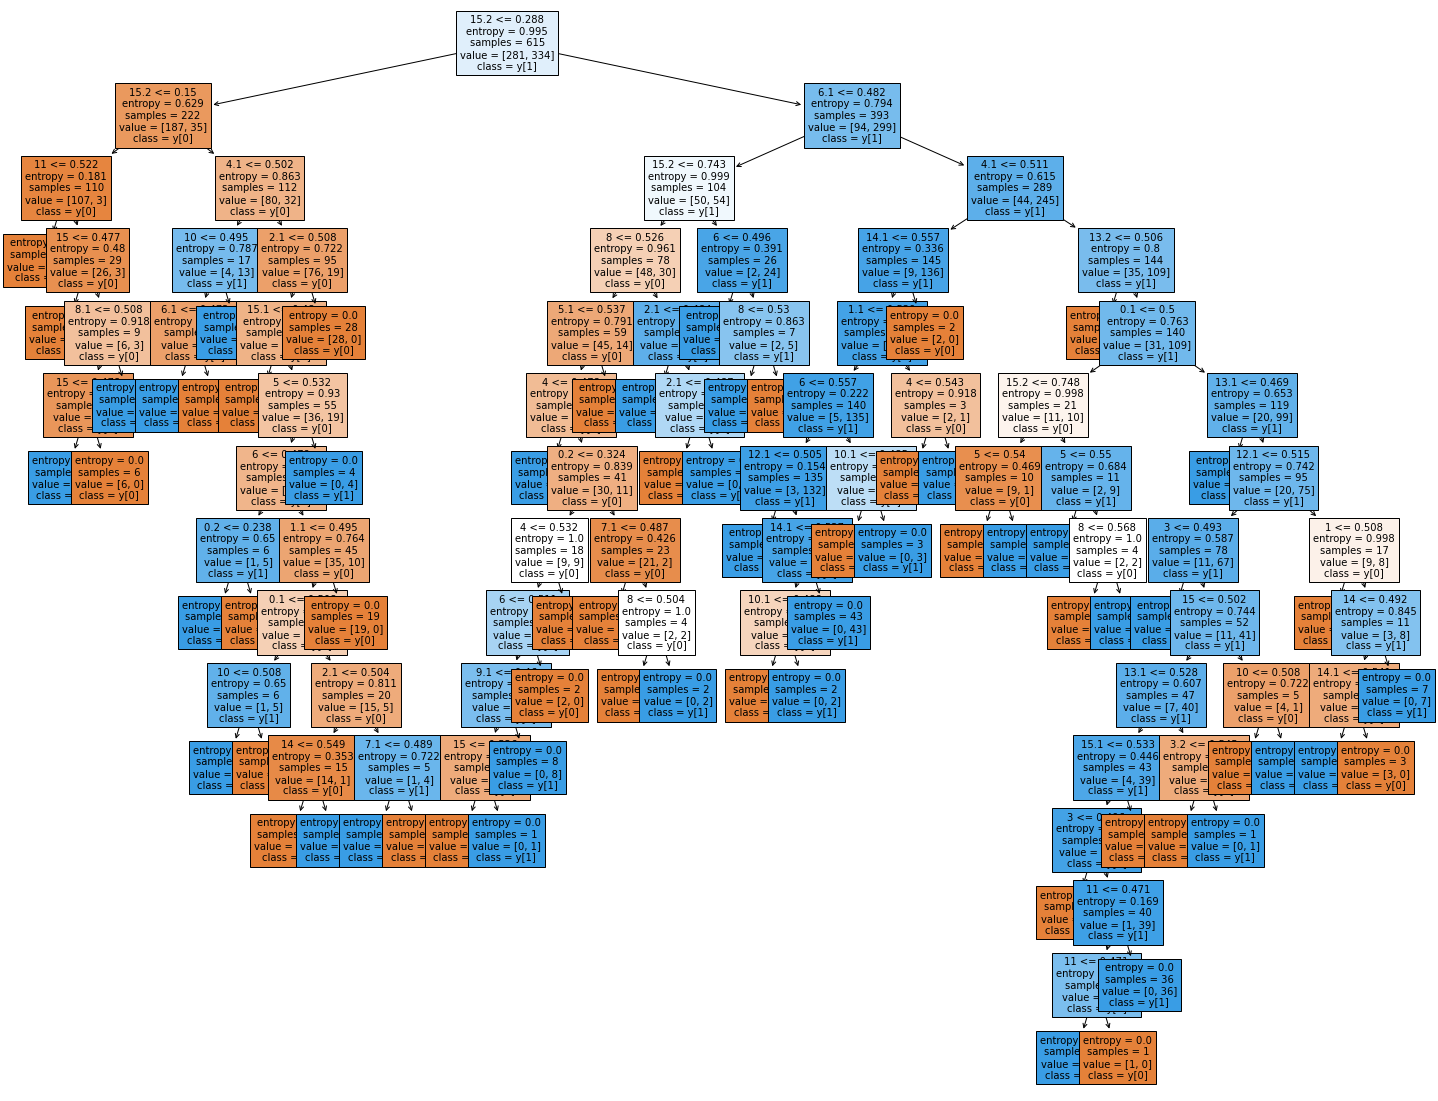

In [31]:
# decision tree
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, Y_train_binary)
Y_predictions = clf.predict(X_test)
cm = confusion_matrix(Y_predictions, Y_test_binary)
print("Confusion Matrix is:")
print(cm)
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements
print("Accuracy is : " + str(accuracy(cm)))
    
print("Report")
print(classification_report(Y_test_binary, Y_predictions))
    
#Visualization of the tree
plt.figure(figsize=(25,20))
tree.plot_tree(clf, filled=True, fontsize=10, max_depth= None,feature_names = list(X_train.columns), class_names = True)
plt.show()

In [32]:
# save clf model
from joblib import dump, load
dump(clf, '../Models/Meta_only/hybridMeta_dt.joblib')

['../Models/Meta_only/hybridMeta_dt.joblib']

In [33]:
# function for Decision tree, and random forest testing
def Test_DT(path_train,path_test,model_name):
    Train = pd.read_csv(path_train)
    Test = pd.read_csv(path_test)
    
    X_train = Train.iloc[:,:-1]
    Y_train = Train.iloc[:,-1]

    X_test = Test.iloc[:,:-1]
    Y_test = Test.iloc[:,-1]

    #binarize the target
    Y_train_binary = Y_train.apply(lambda x: 1 if x > 0 else 0)
    Y_test_binary = Y_test.apply(lambda x: 1 if x > 0 else 0)

    model = load(model_name)

    Y_pred = model.predict(X_test)
    
    cm = confusion_matrix(Y_pred, Y_test_binary)
    print(cm)
    print(classification_report(Y_test_binary, Y_pred, digits=4))
    
    mismatch = [i for i, (a,b) in enumerate(zip(Y_pred, Y_test_binary)) if a != b]
    print(mismatch)

In [34]:
#test on each dataset for decision tree
print("Cle test")
path_train = 'cle_metadata_hybrid_train.csv'
path_test = 'cle_metadata_hybrid_test.csv'
model = '../Models/Meta_only/hybridMeta_dt.joblib'
Test_DT(path_train,path_test,model)

print("==================")

print("vir test")
path_train = 'vir_metadata_hybrid_train.csv'
path_test = 'vir_metadata_hybrid_test.csv'
model = '../Models/Meta_only/hybridMeta_dt.joblib'
Test_DT(path_train,path_test,model)

print("==================")
print("hun test")
path_train = 'hun_metadata_hybrid_train.csv'
path_test = 'hun_metadata_hybrid_test.csv'
model = '../Models/Meta_only/hybridMeta_dt.joblib'
Test_DT(path_train,path_test,model)

print("==================")
print("swi test")
path_train = 'swi_metadata_hybrid_train.csv'
path_test = 'swi_metadata_hybrid_test.csv'
model = '../Models/Meta_only/hybridMeta_dt.joblib'
Test_DT(path_train,path_test,model)

Cle test
[[38 11]
 [14 37]]
              precision    recall  f1-score   support

           0     0.7755    0.7308    0.7525        52
           1     0.7255    0.7708    0.7475        48

    accuracy                         0.7500       100
   macro avg     0.7505    0.7508    0.7500       100
weighted avg     0.7515    0.7500    0.7501       100

[0, 6, 9, 19, 23, 26, 27, 28, 35, 37, 39, 44, 46, 50, 53, 63, 64, 66, 70, 73, 74, 77, 81, 87, 96]
vir test
[[10 14]
 [ 5 37]]
              precision    recall  f1-score   support

           0     0.4167    0.6667    0.5128        15
           1     0.8810    0.7255    0.7957        51

    accuracy                         0.7121        66
   macro avg     0.6488    0.6961    0.6543        66
weighted avg     0.7754    0.7121    0.7314        66

[2, 3, 4, 8, 9, 10, 19, 20, 25, 28, 37, 39, 42, 45, 50, 57, 58, 60, 61]
hun test
[[50 12]
 [10 26]]
              precision    recall  f1-score   support

           0     0.8065    0.8333    

# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, Y_train_binary)
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_pred, Y_test_binary)
print(cm)
print(classification_report(Y_test_binary, Y_pred))

[[101  20]
 [ 29 155]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       130
           1       0.84      0.89      0.86       175

    accuracy                           0.84       305
   macro avg       0.84      0.83      0.83       305
weighted avg       0.84      0.84      0.84       305



In [37]:
dump(classifier, '../Models/Meta_only/hybridMeta_rf.joblib')

['../Models/Meta_only/hybridMeta_rf.joblib']

In [38]:
#test on each dataset for Random Forest
print("Cle test")
path_train = 'cle_metadata_hybrid_train.csv'
path_test = 'cle_metadata_hybrid_test.csv'
model = '../Models/Meta_only/hybridMeta_rf.joblib'
Test_DT(path_train,path_test,model)

print("==================")

print("vir test")
path_train = 'vir_metadata_hybrid_train.csv'
path_test = 'vir_metadata_hybrid_test.csv'
model = '../Models/Meta_only/hybridMeta_rf.joblib'
Test_DT(path_train,path_test,model)

print("==================")
print("hun test")
path_train = 'hun_metadata_hybrid_train.csv'
path_test = 'hun_metadata_hybrid_test.csv'
model = '../Models/Meta_only/hybridMeta_rf.joblib'
Test_DT(path_train,path_test,model)

print("==================")
print("swi test")
path_train = 'swi_metadata_hybrid_train.csv'
path_test = 'swi_metadata_hybrid_test.csv'
model = '../Models/Meta_only/hybridMeta_rf.joblib'
Test_DT(path_train,path_test,model)

Cle test
[[39  8]
 [13 40]]
              precision    recall  f1-score   support

           0     0.8298    0.7500    0.7879        52
           1     0.7547    0.8333    0.7921        48

    accuracy                         0.7900       100
   macro avg     0.7923    0.7917    0.7900       100
weighted avg     0.7938    0.7900    0.7899       100

[0, 9, 19, 27, 28, 37, 39, 46, 53, 63, 64, 65, 66, 72, 73, 75, 77, 81, 85, 86, 91]
vir test
[[ 7  2]
 [ 8 49]]
              precision    recall  f1-score   support

           0     0.7778    0.4667    0.5833        15
           1     0.8596    0.9608    0.9074        51

    accuracy                         0.8485        66
   macro avg     0.8187    0.7137    0.7454        66
weighted avg     0.8410    0.8485    0.8338        66

[4, 8, 10, 19, 20, 23, 26, 48, 57, 58]
hun test
[[54  9]
 [ 6 29]]
              precision    recall  f1-score   support

           0     0.8571    0.9000    0.8780        60
           1     0.8286    0.76

# SVM

In [39]:
from sklearn.svm import SVC

In [40]:
svc = SVC()
svc.fit(X_train, Y_train_binary.values.ravel())
y_pred = svc.predict(X_test)
print(confusion_matrix(Y_test_binary, y_pred))
print(classification_report(Y_test_binary, y_pred))

[[101  29]
 [ 32 143]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       130
           1       0.83      0.82      0.82       175

    accuracy                           0.80       305
   macro avg       0.80      0.80      0.80       305
weighted avg       0.80      0.80      0.80       305



In [41]:
import joblib
joblib.dump(svc, "../Models/Meta_only/hybridMeta_svm.pkl") 

['../Models/Meta_only/hybridMeta_svm.pkl']

In [42]:
#test on each dataset for SVM
print("Cle test")
path_train = 'cle_metadata_hybrid_train.csv'
path_test = 'cle_metadata_hybrid_test.csv'
model = '../Models/Meta_only/hybridMeta_svm.pkl'
Test_DT(path_train,path_test,model)

print("==================")

print("vir test")
path_train = 'vir_metadata_hybrid_train.csv'
path_test = 'vir_metadata_hybrid_test.csv'
model = '../Models/Meta_only/hybridMeta_svm.pkl'
Test_DT(path_train,path_test,model)

print("==================")
print("hun test")
path_train = 'hun_metadata_hybrid_train.csv'
path_test = 'hun_metadata_hybrid_test.csv'
model = '../Models/Meta_only/hybridMeta_svm.pkl'
Test_DT(path_train,path_test,model)

print("==================")
print("swi test")
path_train = 'swi_metadata_hybrid_train.csv'
path_test = 'swi_metadata_hybrid_test.csv'
model = '../Models/Meta_only/hybridMeta_svm.pkl'
Test_DT(path_train,path_test,model)

Cle test
[[36 15]
 [16 33]]
              precision    recall  f1-score   support

           0     0.7059    0.6923    0.6990        52
           1     0.6735    0.6875    0.6804        48

    accuracy                         0.6900       100
   macro avg     0.6897    0.6899    0.6897       100
weighted avg     0.6903    0.6900    0.6901       100

[0, 9, 14, 19, 22, 26, 27, 28, 35, 38, 39, 42, 46, 48, 54, 60, 62, 63, 64, 65, 70, 74, 75, 77, 79, 81, 85, 86, 89, 91, 93]
vir test
[[10  5]
 [ 5 46]]
              precision    recall  f1-score   support

           0     0.6667    0.6667    0.6667        15
           1     0.9020    0.9020    0.9020        51

    accuracy                         0.8485        66
   macro avg     0.7843    0.7843    0.7843        66
weighted avg     0.8485    0.8485    0.8485        66

[4, 8, 10, 19, 20, 23, 28, 36, 57, 64]
hun test
[[54  9]
 [ 6 29]]
              precision    recall  f1-score   support

           0     0.8571    0.9000    0.8780  

# Bayesian Classifier

In [43]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, Y_train_binary)
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_pred, Y_test_binary)
print(cm)
print(classification_report(Y_test_binary, Y_pred))

dump(clf, '../Models/Meta_only/hybridMeta_NB.joblib')

[[109  30]
 [ 21 145]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       130
           1       0.87      0.83      0.85       175

    accuracy                           0.83       305
   macro avg       0.83      0.83      0.83       305
weighted avg       0.84      0.83      0.83       305



['../Models/Meta_only/hybridMeta_NB.joblib']

In [44]:
print("Cle test")
path_train = 'cle_metadata_hybrid_train.csv'
path_test = 'cle_metadata_hybrid_test.csv'
model = '../Models/Meta_only/hybridMeta_NB.joblib'
Test_DT(path_train,path_test,model)

print("==================")

print("vir test")
path_train = 'vir_metadata_hybrid_train.csv'
path_test = 'vir_metadata_hybrid_test.csv'
model = '../Models/Meta_only/hybridMeta_NB.joblib'
Test_DT(path_train,path_test,model)

print("==================")
print("hun test")
path_train = 'hun_metadata_hybrid_train.csv'
path_test = 'hun_metadata_hybrid_test.csv'
model = '../Models/Meta_only/hybridMeta_NB.joblib'
Test_DT(path_train,path_test,model)

print("==================")
print("swi test")
path_train = 'swi_metadata_hybrid_train.csv'
path_test = 'swi_metadata_hybrid_test.csv'
model = '../Models/Meta_only/hybridMeta_NB.joblib'
Test_DT(path_train,path_test,model)

Cle test
[[38 11]
 [14 37]]
              precision    recall  f1-score   support

           0     0.7755    0.7308    0.7525        52
           1     0.7255    0.7708    0.7475        48

    accuracy                         0.7500       100
   macro avg     0.7505    0.7508    0.7500       100
weighted avg     0.7515    0.7500    0.7501       100

[0, 6, 9, 19, 23, 26, 27, 28, 35, 37, 39, 44, 46, 50, 53, 63, 64, 66, 70, 73, 74, 77, 81, 87, 96]
vir test
[[10 14]
 [ 5 37]]
              precision    recall  f1-score   support

           0     0.4167    0.6667    0.5128        15
           1     0.8810    0.7255    0.7957        51

    accuracy                         0.7121        66
   macro avg     0.6488    0.6961    0.6543        66
weighted avg     0.7754    0.7121    0.7314        66

[2, 3, 4, 8, 9, 10, 19, 20, 25, 28, 37, 39, 42, 45, 50, 57, 58, 60, 61]
hun test
[[50 12]
 [10 26]]
              precision    recall  f1-score   support

           0     0.8065    0.8333    